# Kaggle Titanic Analysis Example

Kaggle Titnic 分析例

Explanation of the next cell 次のセルの説明：

This is a setting specific to the Kaggle platform.
ここはKaggleプラットフォーム固有の設定。


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Tips

If the Kaggle site is slow, you can download your NotesBook from Kaggle Site and train data, test data to your local machine and analyze it in Jupyter on your computer, but be sure to upload it as a Kaggle competition notebook when you're done.

Kaggleでのノートブック操作が非常に重い場合は、Kaggleで作成されたノートブックを一旦、自分のローカルマシンにダウンロードして作業を行う。この際、データもダウンロードすること。

## Read train data

As explained in the lecture for week 8, if emphasis is on prediction, data is divided into two (or three) parts. A model learned from the training data is used to check the prediction accuracy with the set-aside test data.  


On Kaggle, training and test data are provided separately. Models are typically trained using the former and used to make predictions on the test data. The results are then often submitted as competition deliverables (submissions).

第８週の講義で説明したように、予測を重視する場合、データを２つ（ないし３つ）に分割し、訓練データで学習したモデルを使って、取り除けておいたテストデータで予測の精度を確認する。

Kaggleでは、訓練データとテストデータが分けられており、前者で学習したモデルを使って、テストデータを予測し、その結果をコンペの成果物として提出する（サブミッション）ことが多い。

Explanation of the next cell 次のセルの説明：

reading the train data with pandas read_csv function　ライブラリを使って訓練データを読み込み

In [ ]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

When working in your own notebook, specify the appropriate folder where the data is located. 
For example:

ノートブック、訓練データ、テストデータの３つをKaggleのあなたのコンペからダウンロードした場合は、ダウンロードしたフォルダを指定して読み込むこと。
例えば以下のようにする。

In [ ]:
# import pandas as pd
# train = pd.read_csv('C:/Users/Name/Downloads/train.csv')

In [1]:
import pandas as pd

train = pd.read_csv('/mnt/hdd1/OneDrive/2020/class/DS/data/train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explanation of the next cell 次のセルの説明：


Check the columns names データの列名を確認


In [2]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Summarize features


Explanation of the next cell 次のセルの説明：

Check various statistical measures. 各種統計量を確認する。

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Ratio of Survived


Explanation of the next cell 次のセルの説明： 

First, confirm the survival rate of the training data. まず訓練データの生存割合を確認しておく。

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64


Explanation of the next cell 次のセルの説明：

性別ごとに生存割合を確認する。Check the survival rate by gender.



In [5]:
train.groupby('Sex')['Survived'].mean()
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Ages


Explanation of the next cell 次のセルの説明：

年齢を１８歳で分割し、生存割合をみる。 Divide the age into 18-year-old segments and check the survival rate.


In [6]:
Age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', Age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

## Missing values

Explanation of the next cell 次のセルの説明：

Check for missing values 
欠損値の確認



In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualization

Explanation of the next cell 次のセルの説明：

いくつかの特徴量の可視化。　Visualization of several features.

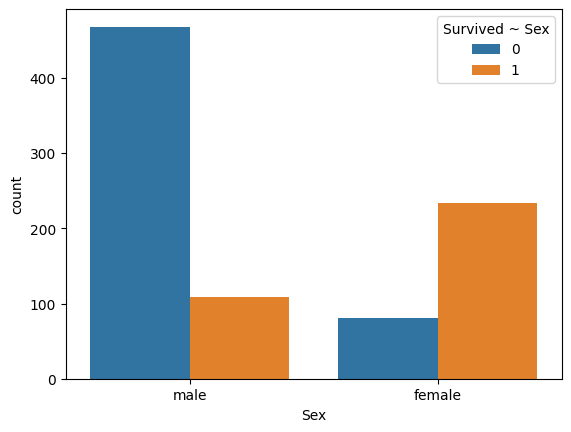

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Sex', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Sex")

<Axes: xlabel='Sex', ylabel='Age'>

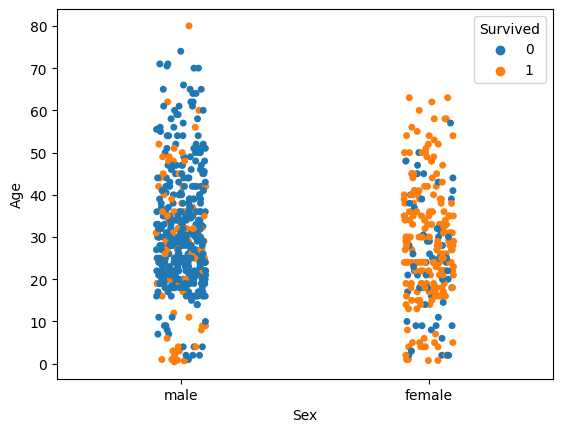

In [9]:
sns.stripplot(x='Sex', y='Age', data=train, hue='Survived')


##  With family　


Explanation of the next cell 次のセルの説明：


If a family member is on the same ship, it can be confirmed that the survival rate is likely to be affected.　家族が同船している場合、生存率に影響がありそうなのが確認できる。

### Brothers and sisters


Explanation of the next cell 次のセルの説明：


Brothers and sisters are on the same ship.　兄弟姉妹が同船している場合

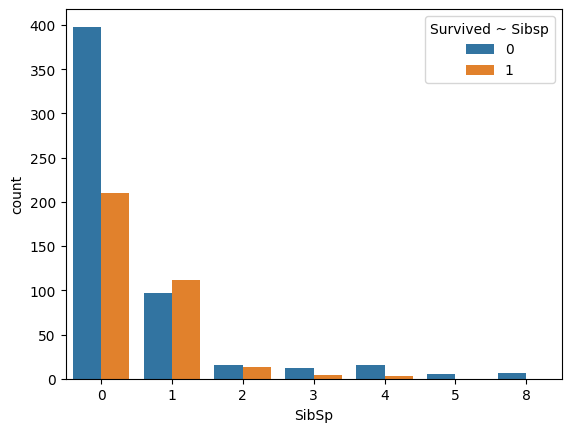

In [10]:
sns.countplot(x = 'SibSp', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Sibsp")

### parents or children


Explanation of the next cell 次のセルの説明：

Paents or children. 親あるいは子供 


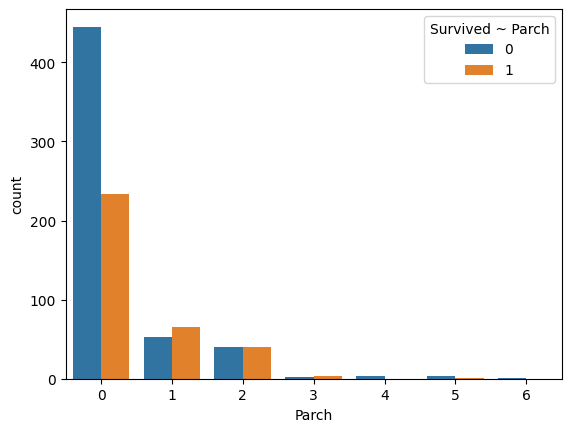

In [11]:
sns.countplot(x = 'Parch', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Parch")


Explanation of the next cell 次のセルの説明：

兄弟姉妹あるいは親、子供があわせて一人以上いたかどうかを表す変数（特徴量）を新たに追加 Add a new variable (feature) that indicates whether there was one or more sibling, parent, or child.

In [13]:
import numpy as np
train['Alone']=np.where((train["SibSp"]+train["Parch"])>0,0,1)
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

## Port of embarkation 

Explanation of the next cell 次のセルの説明：

 The port of embarkation does not seem to be related to the survival rate. 乗船した港は生存割合には関係なさそうだ。

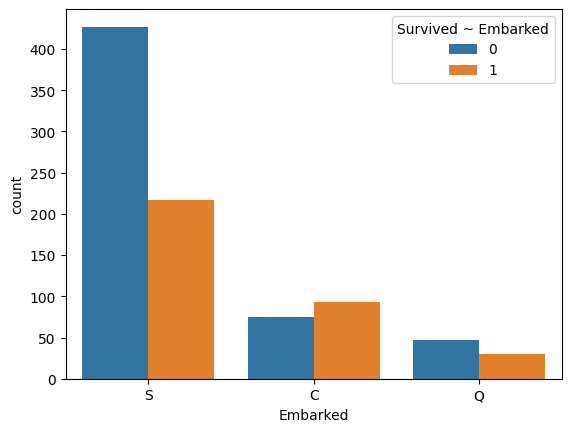

In [14]:
sns.countplot(x = 'Embarked', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Embarked")

In [15]:
train.drop('Embarked', axis=1, inplace=True)

## Ticket fare 


Explanation of the next cell 次のセルの説明：

The ticket fare is related to the cabin class, but it seems unusable due to the lack of uniformity in the input units チケット運賃は、船室の等級と関係するが、入力単位に統一がないため、使えそうにない。




In [16]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [17]:
train.drop('Ticket', axis=1, inplace=True)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Alone'],
      dtype='object')

## Passenger names, numbers, and cabin numbers

Explanation of the next cell 次のセルの説明：

The passenger names, numbers, and cabin numbers are considered unnecessary. (However, there are data scientists who have utilized the presence of shared surnames as a feature. 乗客の名前、番号や客室番号は不要と思われる。（ただし、同姓が確認できることを、特徴量として利用したデータサイエンティストがいる。）

In [19]:
train.drop(['PassengerId','Name','Cabin'], axis=1, inplace=True)


## Fare and  Cabin class


Explanation of the next cell 次のセルの説明：

Since it is believed that the fare is related to the cabin class, it is possible to consider excluding it to avoid multicollinearity. However, when checking the correlation, it seems to be small, so it will be kept as it is.
 運賃は、船室等級と関係していると思われるので、多重共線性を避けるために省くことも考えられるが、相関を確認すると小さいようなので、このまま残す。

In [20]:
train.corr()

/tmp/ipykernel_55697/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,Fare,Alone
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.135207
Age,-0.077221,-0.369226,1.000000,0.096067,0.198270
Fare,0.257307,-0.549500,0.096067,1.000000,-0.271832
Alone,-0.203367,0.135207,0.198270,-0.271832,1.000000


In [21]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Alone'], dtype='object')

## Preprocessing

- Focus on features that are likely to have an impact on survival.生存に影響の有りそうな特徴量に絞る
- Transform the data to make it suitable for applying machine learning techniques. データを機械学習の手法を適用できるように変換する

Although there are many missing values for age, since it is an important variable, we will not remove the data but instead impute the missing values with the median.　

年齢の欠損値が多いが、重要な変数なので、データを削ることはせず、中央値で補うこととする。



Explanation of the next cell 次のセルの説明：

However, since we will later impute missing values in the test data using the statistics from the training data, let's check the median of the age in the test data beforehand.
ただし、後でテストデータの欠損値を補う際、訓練データの統計量をテストデータにも適用するので、テストデータの年齢の中央値を確認しておく。

In [22]:
TrainMedian = train["Age"].median(skipna=True)# we use this value for test data too
train["Age"].fillna(TrainMedian, inplace=True)

## Cabin class 

Explanation of the next cell 次のセルの説明：

The cabin class is represented with numerical values of 1, 2, and 3. However, if left as is, it may be analyzed as if 3 is better (higher) than 1. To avoid this, it should be converted into a categorical variable."
船室の等級は１，２，３と数値が入っているが、このままだと、３のほうが１よりも良い（大きい）ものとして分析されてしまうので、カテゴリ変数に変換する。

The same can be said for Sex as well. 性別についても同じことが言える。

In [23]:
train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
train['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

## Categories  

Explanation of the next cell 次のセルの説明：

convert the categorical variables to dummies ダミー変数化する

In [25]:
training = pd.get_dummies(train, columns=["Pclass","Sex"], drop_first=True)
training

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,0,0,0,0
2,1,26.0,7.9250,1,0,1,0
3,1,35.0,53.1000,0,0,0,0
4,0,35.0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1
887,1,19.0,30.0000,1,0,0,0
888,0,28.0,23.4500,0,0,1,0
889,1,26.0,30.0000,1,0,0,1


## Standardize

Explanation of the next cell 次のセルの説明：

Standardize the Age and the Fare 年齢と運賃を標準化する。

In [26]:
from sklearn.preprocessing import StandardScaler
train_standard = StandardScaler()
train_copied = training.copy()
train_standard.fit(train_copied[['Age', 'Fare']])
train_std = pd.DataFrame(train_standard.transform(train_copied[['Age', 'Fare']]))
train_std

,0,1
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


In [27]:
training[['Age','Fare'] ] = train_std
training

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Sex_male
0,0,-0.565736,-0.502445,0,0,1,1
1,1,0.663861,0.786845,0,0,0,0
2,1,-0.258337,-0.488854,1,0,1,0
3,1,0.433312,0.420730,0,0,0,0
4,0,0.433312,-0.486337,1,0,1,1
...,...,...,...,...,...,...,...
886,0,-0.181487,-0.386671,1,1,0,1
887,1,-0.796286,-0.044381,1,0,0,0
888,0,-0.104637,-0.176263,0,0,1,0
889,1,-0.258337,-0.044381,1,0,0,1


## Logistic regression model 


Explanation of the next cell 次のセルの説明：

Since the target variable is survival, let's fit a logistic regression model to predict binary values. 目的変数が生存なので、二値の値を予測するロジスティック回帰モデルを当てはめてみる

In [28]:
from sklearn.linear_model import LogisticRegression

cols = ["Age","Fare","Alone","Pclass_2","Pclass_3","Sex_male"] 
X =training[cols]
y = training['Survived']

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

# Accuracy 


Explanation of the next cell 次のセルの説明：

Let's check the accuracy of predictions using the trained data.
学習したデータで、予測の精度を確認してみる。

In [29]:
from sklearn.metrics import accuracy_score
train_predicted =model.predict(X)
accuracy_score( train_predicted, y)

0.7934904601571269

## Changing the model

Explanation of the next cell 次のセルの説明：

 Since the results are not very favorable, let's try changing the model. we adopt random forests.
あまりよろしくないので、モデルを変えてみる。ここではランダムフォレストを適用する。

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(bootstrap=True,n_estimators=10,criterion='gini',max_depth=None,random_state=1)
model.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=1)

In [31]:
predicted_train2 = model.predict(X)
accuracy_score(predicted_train2 , y)

0.9640852974186308

## Preprocessing test data as train data
 
Explanation of the next cell 次のセルの説明：

Since the prediction accuracy has improved, let's use this model to predict the test data.
予測精度が上がったので、このモデルを使ってテストデータを予測する。


In [40]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()
# if you  are workng on your computer, you should change the path above 
# for example 
# test = pd.read_csv('C:/Users/Name/Downloads/test.csv')
# test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Explanation of the next cell 次のセルの説明：

Apply the same preprocessing steps that were performed on the training data to the test data.
訓練データに対して施したのと同じ前処理を、テストデータに適用する。

In [33]:
test.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)


In [34]:
test["Age"].fillna(TrainMedian, inplace=True)
test["Fare"].fillna(train.Fare.median(), inplace=True)
test['Alone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
testing=pd.get_dummies(test, columns=["Pclass","Sex"], drop_first=True)
testing

,Age,Fare,Embarked,Alone,Pclass_2,Pclass_3,Sex_male
0,34.5,7.8292,Q,1,0,1,1
1,47.0,7.0000,S,0,0,1,0
2,62.0,9.6875,Q,1,1,0,1
3,27.0,8.6625,S,1,0,1,1
4,22.0,12.2875,S,0,0,1,0
...,...,...,...,...,...,...,...
413,28.0,8.0500,S,1,0,1,1
414,39.0,108.9000,C,1,0,0,0
415,38.5,7.2500,S,1,0,1,1
416,28.0,8.0500,S,1,0,1,1


In [35]:
test_copied = testing.copy()
test_std = train_standard.transform(test_copied[['Age','Fare']])

testing[['Age','Fare']] = test_std
testing

,Age,Fare,Embarked,Alone,Pclass_2,Pclass_3,Sex_male
0,0.394887,-0.490783,Q,1,0,1,1
1,1.355510,-0.507479,S,0,0,1,0
2,2.508257,-0.453367,Q,1,1,0,1
3,-0.181487,-0.474005,S,1,0,1,1
4,-0.565736,-0.401017,S,0,0,1,0
...,...,...,...,...,...,...,...
413,-0.104637,-0.486337,S,1,0,1,1
414,0.740711,1.544246,C,1,0,0,0
415,0.702286,-0.502445,S,1,0,1,1
416,-0.104637,-0.486337,S,1,0,1,1


## Predicting the test data

Explanation of the next cell 次のセルの説明：

Using the model trained on the training data, predict the survival rates for the test data.
訓練データで学習したモデルを使って、テストデータの生存割合を予測する。

In [36]:
X_test = testing[cols]
test_predicted = model.predict(X_test)

In [37]:
test_predicted


array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Submit your results 

Explanation of the next cell 次のセルの説明：

To submit the predictions, save the results to a file.
予測結果を提出するため、ファイルに保存する。

In [ ]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived'] = list(map(int, test_predicted))
sub.to_csv('submission.csv', index=False)

## Run all

Now press the run all button in Kaggle's notebook (editing page) menu.　Kaggleのノートブック上に Run All ボタンを押す。


If you were working on your local machine, upload the completed notebook to the Code page of the competition you are participating in with Kaggle.　ローカルマシンで作業をしていた場合、完成したノートブックをKaggleで参加しているコンペのCodeページにアップロードする。

How to submit the file

ファイルの提出の仕方

To begin, press the [Run All] button on the screen to execute the code. If it runs properly, a file named 'submission.csv' should be generated. Look for the tab on the right side called [Competitions] and find the [Submit] button. Click on it to complete the submission. Let's check the results. Go back to the competition's description page and look at the Leaderboard. Your name and score should be displayed!

Also press the share button on Notebook editing page, to change the publishing status to public.


https://www.kaggle.com/code/wakepon/starter-1